In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
X = df.iloc[:, [2, 4]].values

In [9]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

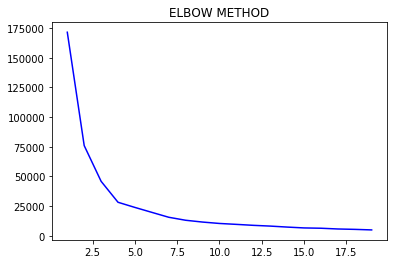

In [10]:
import seaborn as sns
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(X)

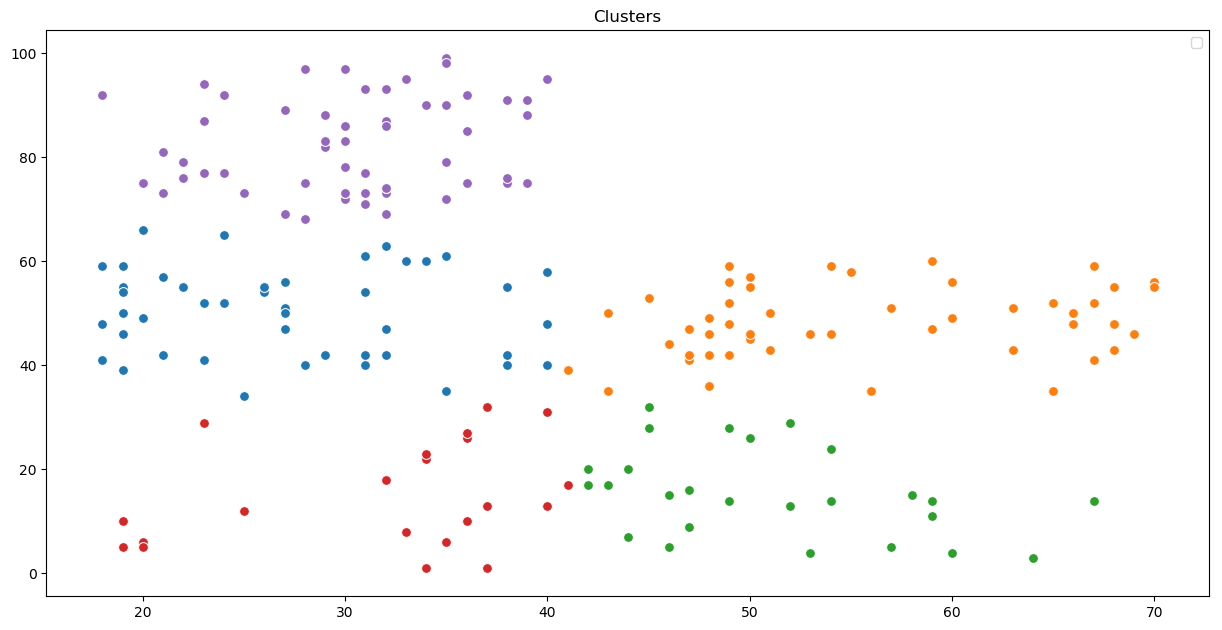

In [12]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
plt.title('Clusters')
plt.legend()
plt.show()

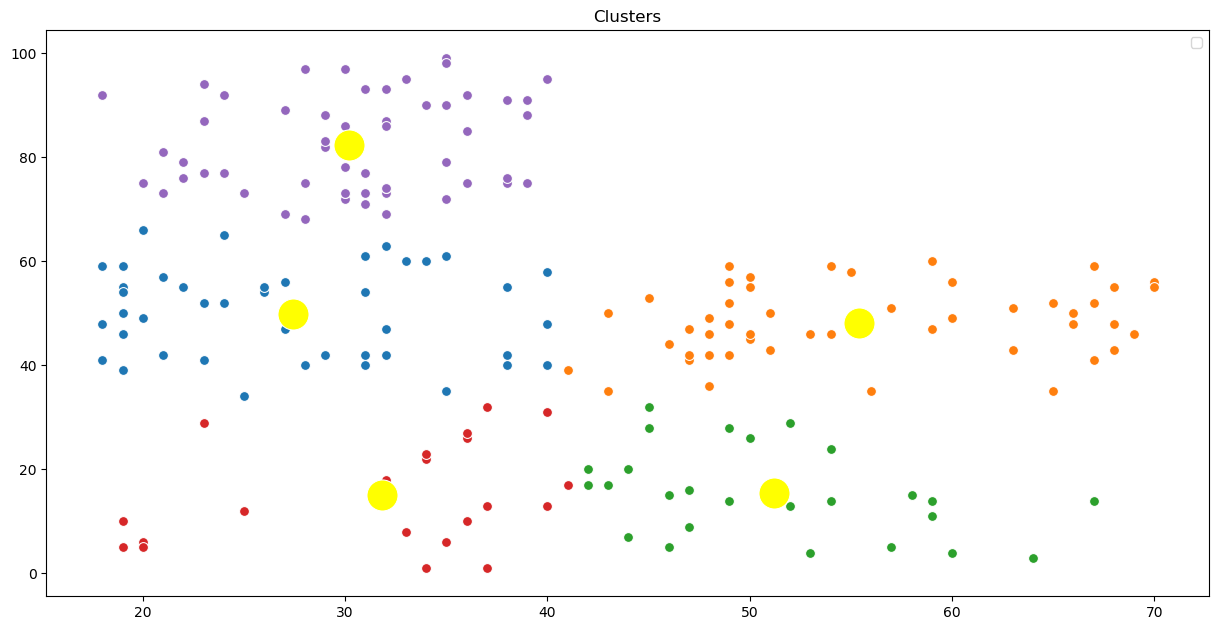

In [13]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()